In [36]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
from control import lqr, dare
from dissertation_codes.environment import Particle3D
from dissertation_codes.utils import compute_gamma

In [37]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [63]:
def digital_converter(signal, total_bit, frac_bit):
    print(signal)
    resolution = 2**(-frac_bit)
    if abs(int(signal/resolution))> 2**19:
        print(signal)
        print(abs(int(signal/resolution)))
        raise ValueError
    if signal >= 0:
        return int(signal/resolution)
    else:
        return int(2**(total_bit)-int(-signal/resolution))

In [64]:
calib_x = 686554
calib_y = 707836
calib_z = 106836
omegas = [2*np.pi*96236.747, 2*np.pi*102000.8279, 2*np.pi*31517.99568]
gamma = compute_gamma(143e-9/2, 0, rho=2200, T=293)
print(gamma)

elec_xx = 2.83e-16
elec_yx = 2.18e-16
elec_xy = 2.21e-16
elec_yy = 2.36e-16

m = 2200*4*np.pi*np.power((143e-9)/2, 3)/3
B = (1/m)*np.array([[0, 0, 0],
                        [0,0,0],
                        [0,0,0],
                               [-1, elec_yx/elec_xx, 0],
                               [elec_xy/elec_xx, elec_yy/elec_xx, 0],
                               [0, 0, 1]])


A = np.array([[0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [-omegas[0]**2, 0, 0, -gamma, 0, 0],
              [0, -omegas[1]**2, 0, 0, -gamma, 0],
              [0, 0, -omegas[2]**2, 0, 0, -gamma]
])

g_fb = 0.01

cost_states = m*np.array([[omegas[0]**2, 0, 0, 0, 0, 0],
                        [0, omegas[1]**2, 0, 0, 0, 0],
                        [0, 0, omegas[2]**2, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 0, 0, 1]])
control_effort = np.array([[1/(omegas[0]**2), 0, 0],
                        [0, 1/(omegas[1]**2), 0],
                        [0, 0, 1/(omegas[2]**2)]])
Ad = scipy.linalg.expm(A *64e-9)
Bd = B * 64e-9
X, L, G = dare(Ad, Bd, cost_states, (1/(m*g_fb))*control_effort)
G_rp_bit = np.zeros((3, 6))
G_rp_bit[0,0] = digital_converter(G[0,0]/(5*elec_xx*calib_x), 16, 10)
G_rp_bit[0,1] = digital_converter(G[0,1]/(5*calib_y*elec_xx), 16, 10)
G_rp_bit[0,3] = digital_converter(G[0,3]*omegas[0]/(5*calib_x*elec_xx), 16, 10)
G_rp_bit[0,4] = digital_converter(G[0,4]*omegas[1]/(5*calib_y*elec_xx), 16, 10)
G_rp_bit[1,0] = digital_converter(G[1,0]/(5*calib_x*elec_xx), 16, 10)
G_rp_bit[1,1] = digital_converter(G[1,1]/(5*calib_y*elec_xx), 16, 10)
G_rp_bit[1,3] = digital_converter(G[1,3]*omegas[0]/(5*calib_x*elec_xx), 16, 10)
G_rp_bit[1,4] = digital_converter(G[1,4]*omegas[1]/(5*calib_y*elec_xx), 16, 10)
G_rp_bit

0.0
-0.3496480857766915
0.7972351593680843
-136.4504851597972
119.13602798775388
1.5031225180984482
-1.1504723217220065
122.22291216959721
148.22721617588383


array([[ 65178.,    816.,      0., -74189., 121995.,      0.],
       [  1539.,  64358.,      0., 125156., 151784.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.]])

In [60]:
calib_x = 686554
calib_y = 707836
calib_z = 106836
omegas = [2*np.pi*96236.747, 2*np.pi*102000.8279, 2*np.pi*31517.99568]
gamma = compute_gamma(143e-9/2, 0, rho=2200, T=293)
elec_xx = 2.83e-16
elec_yx = 2.18e-16
elec_xy = 2.21e-16
elec_yy = 2.36e-16
m = 2200*4*np.pi*np.power((143e-9)/2, 3)/3
B = (1/m)*np.array([[0, 0, 0],
                        [0,0,0],
                        [0,0,0],
                            [-1, elec_yx/elec_xx, 0],
                            [elec_xy/elec_xx, elec_yy/elec_xx, 0],
                            [0, 0, 1]])
A = np.array([[0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1],
            [-omegas[0]**2, 0, 0, -gamma, 0, 0],
            [0, -omegas[1]**2, 0, 0, -gamma, 0],
            [0, 0, -omegas[2]**2, 0, 0, -gamma]
])
g_fb = 0.01

cost_states = m*np.array([[omegas[0]**2, 0, 0, 0, 0, 0],
                        [0, omegas[1]**2, 0, 0, 0, 0],
                        [0, 0, omegas[2]**2, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 0, 0, 1]])
control_effort = np.array([[1/(omegas[0]**2), 0, 0],
                        [0, 1/(omegas[1]**2), 0],
                        [0, 0, 1/(omegas[2]**2)]])

Ad = scipy.linalg.expm(A *64e-9)
Bd = B * 64e-9
X, L, G = dare(Ad, Bd, cost_states, (1/(m*g_fb))*control_effort)
G

array([[-3.39673993e-10,  7.98501121e-10,  0.00000000e+00,
        -2.19222650e-13,  1.86186693e-13,  0.00000000e+00],
       [ 1.46024431e-09, -1.15229920e-09,  0.00000000e+00,
         1.96364495e-13,  2.31650624e-13,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.21772563e-10,
         0.00000000e+00,  0.00000000e+00,  9.42286558e-14]])

In [49]:
def compute_g(pressure):
    calib_x = 686554
    calib_y = 707836
    calib_z = 106836
    omegas = [2*np.pi*96236.747, 2*np.pi*102000.8279, 2*np.pi*31517.99568]
    gamma = compute_gamma(143e-9/2, pressure, rho=2200, T=293)
    elec_xx = 2.83e-16
    elec_yx = 2.18e-16
    elec_xy = 2.21e-16
    elec_yy = 2.36e-16
    m = 2200*4*np.pi*np.power((143e-9)/2, 3)/3
    B = (1/m)*np.array([[0, 0, 0],
                            [0,0,0],
                            [0,0,0],
                                [-1, elec_yx/elec_xx, 0],
                                [elec_xy/elec_xx, elec_yy/elec_xx, 0],
                                [0, 0, 1]])
    A = np.array([[0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1],
                [-omegas[0]**2, 0, 0, -gamma, 0, 0],
                [0, -omegas[1]**2, 0, 0, -gamma, 0],
                [0, 0, -omegas[2]**2, 0, 0, -gamma]
    ])
    g_fb = 0.01

    cost_states = m*np.array([[omegas[0]**2, 0, 0, 0, 0, 0],
                            [0, omegas[1]**2, 0, 0, 0, 0],
                            [0, 0, omegas[2]**2, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 1]])
    control_effort = np.array([[1/(omegas[0]**2), 0, 0],
                            [0, 1/(omegas[1]**2), 0],
                            [0, 0, 1/(omegas[2]**2)]])

    Ad = scipy.linalg.expm(A *64e-9)
    Bd = B * 64e-9
    X, L, G = dare(Ad, Bd, cost_states, (1/(m*g_fb))*control_effort)
    return G

In [56]:
pressures = np.logspace(-8, 3, 100)
G_pressures = np.array([compute_g(pressure) for pressure in pressures])
G_pressures[0]

array([[-3.39673995e-10,  7.98501118e-10,  0.00000000e+00,
        -2.19222650e-13,  1.86186693e-13,  0.00000000e+00],
       [ 1.46024431e-09, -1.15229920e-09,  0.00000000e+00,
         1.96364495e-13,  2.31650624e-13,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.21772563e-10,
         0.00000000e+00,  0.00000000e+00,  9.42286558e-14]])

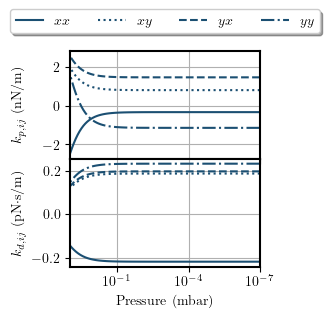

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
factor = 0.7
fig.set_size_inches(3.5*factor, 4*factor, forward=True)

colors = ['#2E86C1', '#85C1E9', '#1B4F72']



ax1.plot(pressures/100, G_pressures[:,0,0]/1e-9, label=r'$xx$', color=colors[2])
ax1.plot(pressures/100, G_pressures[:,0,1]/1e-9, label=r'$xy$', linestyle='dotted', color=colors[2])
ax1.plot(pressures/100, G_pressures[:,1,0]/1e-9, label=r'$yx$', linestyle='dashed', color=colors[2])
ax1.plot(pressures/100, G_pressures[:,1,1]/1e-9, label=r'$yy$', linestyle='-.', color=colors[2])
ax1.set_xscale('log')
ax1.grid(True, which="both", ls="-")
ax1.set_xlabel('Pressure (mbar)')
ax1.set_ylabel(r'$k_{p,ij}$ (nN/m)', labelpad=12)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=4, fancybox=True, shadow=True)




ax2.plot(pressures/100, G_pressures[:,0,3]/1e-12, color=colors[2])
ax2.plot(pressures/100, G_pressures[:,0,4]/1e-12, linestyle='dotted', color=colors[2])
ax2.plot(pressures/100, G_pressures[:,1,3]/1e-12, linestyle='dashed', color=colors[2])
ax2.plot(pressures/100, G_pressures[:,1,4]/1e-12, linestyle='-.', color=colors[2])
ax2.set_xscale('log')
ax2.grid(True, which="both", ls="-")
ax2.invert_xaxis()
ax2.set_xlabel('Pressure (mbar)')
ax2.set_ylabel(r'$k_{d,ij}$ (pN$\cdot$s/m)')
ax2.set_xlim([pressures[-1]/100, pressures[0]/100])
plt.subplots_adjust(wspace=0, hspace=0)

#plt.savefig('../../plots/Chapter 5/electrodes_calib.pdf', dpi=300, bbox_inches = 'tight')




#plt.ylabel(r'$T_{\rm{eff}}$ (K)')
#plt.xlim([2.3, 4e-5])
#plt.ylim([0.3, 400])
#plt.legend()
plt.savefig('../../plots/Chapter 5/gains_vs_pressures.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

In [229]:
G_rp

array([[ 2.23842943e+00,  3.86876968e+00,  0.00000000e+00,
         2.26781869e+00,  3.91516665e+00,  0.00000000e+00],
       [-3.72843345e+00, -6.43764503e+00,  0.00000000e+00,
        -3.77323620e+00, -6.51411641e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  7.42147682e+03,
         0.00000000e+00,  0.00000000e+00,  1.98029546e+06]])

In [91]:
states = 200*np.random.normal(size=(6,1))
new_states = np.zeros((N, 6)) 

for i in tqdm(range(t.shape[0])):
    new_states[i,:] = states[:,0]
    #print(states.shape)
    states = env.step(states, control=-G_lqr@states, delta_t=delta_t, bypass_noise=True)
    #print(G_lqr@states)

  0%|          | 0/31020 [00:00<?, ?it/s]/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_48909/3307748872.py:7: RuntimeWarning: overflow encountered in matmul
  states = env.step(states, control=-G_lqr@states, delta_t=delta_t, bypass_noise=True)
/Users/oscarkremer/miniconda3/lib/python3.8/site-packages/dissertation_codes-0.0.1-py3.8.egg/dissertation_codes/environment/particle3D.py:54: RuntimeWarning: invalid value encountered in matmul
/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_48909/3307748872.py:7: RuntimeWarning: invalid value encountered in matmul
  states = env.step(states, control=-G_lqr@states, delta_t=delta_t, bypass_noise=True)
100%|██████████| 31020/31020 [00:01<00:00, 29774.16it/s]


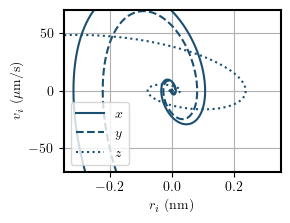

In [6]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.7
fig.set_size_inches(4*factor, 3*factor, forward=True)
plt.plot(1e9*env.zp_x*new_states[:, 0], 1e6*env.zp_px*new_states[:, 3]/env._m_, color=colors[2])
plt.plot(1e9*env.zp_y*new_states[:, 1], 1e6*env.zp_py*new_states[:, 4]/env._m_, color=colors[2], linestyle='dashed')
plt.plot(1e9*env.zp_z*new_states[700:, 2], 1e6*env.zp_pz*new_states[700:, 5]/env._m_, color=colors[2], linestyle='dotted')
plt.xlim([-3.5e-1, 3.5e-1])
plt.grid()
plt.ylim([-70, 70])
plt.legend([r'$x$', r'$y$', r'$z$'], loc='lower left')
plt.xlabel(r'$r_i$ (nm)')
plt.ylabel(r'$v_i$ $(\mu\textrm{m}/\textrm{s})$')
plt.savefig('../../plots/Chapter 3/state_space_trajectory_coupled_actuator.pdf', dpi=300, bbox_inches = 'tight')
plt.show()


In [7]:
gain_num = 100
g_fbs = np.logspace(-2, 1, gain_num)
final_states = np.zeros((gain_num, 6)) 
control_sig = np.zeros((gain_num, 3))
for j, g_fb in tqdm(enumerate(g_fbs)):
    (G_lqr, S, E) = lqr(env.A, env.B, cost_states, control_effort/(g_fb**2))
    states = 100*np.ones(shape=(6,1))
    for i in range(t.shape[0]):
        states = env.step(states, control=-G_lqr@states, delta_t=delta_t, bypass_noise=True)
    final_states[j, :]  = states[:, 0]
    control_sig[j, :] = G_lqr@states[:,0]

100it [01:29,  1.12it/s]


In [8]:
def compute_axis_cost(x, v, weight_x, weight_v, control_effort, control_sig):
    return np.power(x,2)*weight_x+np.power(v,2)*weight_v + control_effort*np.power(control_sig, 2)

In [9]:
j = np.zeros((g_fbs.shape[0],4))
for i in range(final_states.shape[0]):
    x, y, z, px, py, pz = final_states[i,:].ravel()
    ux, uy, uz = control_sig[i,:].ravel()
    j[i,0]  = 0.5*final_states[i,:].T@cost_states@final_states[i,:]+0.5*control_sig[i,:].T@control_effort/(g_fbs[i]**2)@control_sig[i,:]
    j[i,1]  = 0.5*compute_axis_cost(x, px, cost_states[0,0], cost_states[3,3], control_effort[0,0]/(g_fbs[i]**2), control_sig[i, 0])
    j[i,2]  = 0.5*compute_axis_cost(y, py, cost_states[1,1], cost_states[4,4], control_effort[1,1]/(g_fbs[i]**2), control_sig[i, 1])
    j[i,3]  = 0.5*compute_axis_cost(z, pz, cost_states[2,2], cost_states[5,5], control_effort[2,2]/(g_fbs[i]**2), control_sig[i, 2])

#    j[i,2]  = 0.5*final_states[i,:].T@cost_states@final_states[i,:]+0.5*control_sig[i,:].T@control_effort/(g_fb**2)@control_sig[i,:]
#    j[i,3]  = 0.5*final_states[i,:].T@cost_states@final_states[i,:]+0.5*control_sig[i,:].T@control_effort/(g_fb**2)@control_sig[i,:]

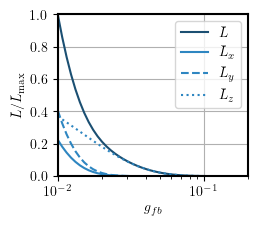

In [10]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.7
fig.set_size_inches(3.5*factor, 3*factor, forward=True)
plt.plot(g_fbs, j[:,0]/max(j[:,0]), color=colors[2])
plt.plot(g_fbs, j[:,1]/max(j[:,0]), color=colors[0], linestyle='solid')
plt.plot(g_fbs, j[:,2]/max(j[:,0]), color=colors[0], linestyle='dashed')
plt.plot(g_fbs, j[:,3]/max(j[:,0]), color=colors[0], linestyle='dotted')
plt.xlim([0.01, 0.2])
plt.ylim([0,1])
plt.xlabel(r'$g_{fb}$')
plt.ylabel(r'$\bar{L}/\bar{L}_{\rm{max}}$')
#plt.yscale('log')
plt.grid()
plt.xscale('log')
plt.legend([r'$\bar{L}$', r'$\bar{L}_x$', r'$\bar{L}_y$', r'$\bar{L}_z$'])
plt.savefig('../../plots/Chapter 3/costs_lqr_coupled_actuator.pdf', dpi=300, bbox_inches = 'tight')

plt.show()

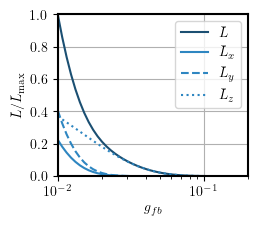

In [ ]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.7
fig.set_size_inches(3.5*factor, 3*factor, forward=True)
plt.plot(g_fbs, j[:,0]/max(j[:,0]), color=colors[2])
plt.plot(g_fbs, j[:,1]/max(j[:,0]), color=colors[0], linestyle='solid')
plt.plot(g_fbs, j[:,2]/max(j[:,0]), color=colors[0], linestyle='dashed')
plt.plot(g_fbs, j[:,3]/max(j[:,0]), color=colors[0], linestyle='dotted')
plt.xlim([0.01, 0.2])
plt.ylim([0,1])
plt.xlabel(r'$g_{fb}$')
plt.ylabel(r'$\bar{L}/\bar{L}_{\rm{max}}$')
#plt.yscale('log')
plt.grid()
plt.xscale('log')
plt.legend([r'$\bar{L}$', r'$\bar{L}_x$', r'$\bar{L}_y$', r'$\bar{L}_z$'])
plt.savefig('../../plots/Chapter 3/costs_lqr_coupled_actuator.pdf', dpi=300, bbox_inches = 'tight')

plt.show()

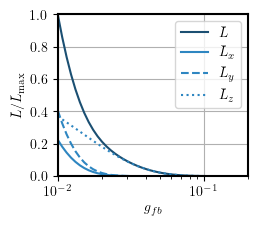

In [ ]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.7
fig.set_size_inches(3.5*factor, 3*factor, forward=True)
plt.plot(g_fbs, j[:,0]/max(j[:,0]), color=colors[2])
plt.plot(g_fbs, j[:,1]/max(j[:,0]), color=colors[0], linestyle='solid')
plt.plot(g_fbs, j[:,2]/max(j[:,0]), color=colors[0], linestyle='dashed')
plt.plot(g_fbs, j[:,3]/max(j[:,0]), color=colors[0], linestyle='dotted')
plt.xlim([0.01, 0.2])
plt.ylim([0,1])
plt.xlabel(r'$g_{fb}$')
plt.ylabel(r'$\bar{L}/\bar{L}_{\rm{max}}$')
#plt.yscale('log')
plt.grid()
plt.xscale('log')
plt.legend([r'$\bar{L}$', r'$\bar{L}_x$', r'$\bar{L}_y$', r'$\bar{L}_z$'])
plt.savefig('../../plots/Chapter 3/costs_lqr_coupled_actuator.pdf', dpi=300, bbox_inches = 'tight')

plt.show()